# Interactive and Geographical Plotting

In [72]:
import numpy as np 
import pandas as pd
import cufflinks as cf
%matplotlib inline

# Checking the version of plotly
#import plotly
#plotly.__version__
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot , iplot

#  To use plotly we need to initate it for each notebook
init_notebook_mode(connected=True)
# To use cufflinks as offline we call the below function
cf.go_offline()

In [73]:
data = np.random.randn(100,4)
df1 = pd.DataFrame( data = data , columns = ['A','B','C','D'])
df1.head()

,A,B,C,D
0,-1.091388,-0.609044,0.768657,0.931565
1,0.082265,0.682197,0.614961,-0.056448
2,-1.855155,-0.476846,1.577336,0.875247
3,1.185854,-0.213727,0.924153,1.422405
4,-0.910671,-0.376404,-0.336405,-0.109716


In [74]:
dic = { 'fruit' : ['apple' , 'banana' , 'mango' , 'guava'] , 'count' : ['15','12','36','6']}
df2 = pd.DataFrame( data = dic)
df2.head()

,fruit,count
0,apple,15
1,banana,12
2,mango,36
3,guava,6


In [75]:
# If we just call pd.plot() with data frame , pandas will call matplot lib and will give the plot
# But if we replace pd.plot() with pd.iplot() it will give interactive plot
df1.iplot(kind = 'scatter')

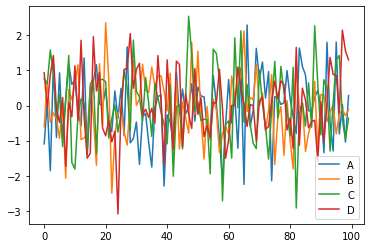

In [76]:
df1.plot()

## Interactive Plotting

### Histogram

In [25]:
df1.iplot(kind = 'hist' , bins = 50)

In [26]:
df1.iplot(kind = 'hist' , bins = 50 )

### KDE Plot

### Area Plot

In [89]:
df1.iplot(kind = 'area' , title = 'Area Plot', legend = True , fill=True)

### Bar Plot

In [33]:
df2.iplot(kind = 'bar' , x = 'fruit' , y = 'count')

In [34]:
df2.iplot(kind = 'barh' , x = 'fruit' , y = 'count')

In [38]:
# asImage = True , a copy of the image will be downloaded in your system
#df2.iplot(kind = 'bar' , asImage= True)
df2.iplot(kind = 'bar' , asImage= False)

In [60]:
df2.iplot(kind = 'bar' , barmode='stack')

### Horizontal Plot

In [85]:
df2.iplot(kind = 'barh' , x = 'fruit' , y = 'count')

### Line Plot

In [87]:
df1.iplot()

### Scatter Plot

In [27]:
df1.iplot(kind = 'scatter' , x = 'A' , y ='B')

In [32]:
# If you don't specify the mode, the points in the scatter plot will be joined to each other
df1.iplot(kind = 'scatter' , x = 'A' , y ='B', mode = 'markers+text' , size = 10)

### Box Plot

In [40]:
df1.iplot(kind = 'box')

### Hex Plot

### Pie Plot

In [97]:
df2.iplot( values = 'count' ,kind = 'pie', labels = 'fruit' , legend = False)

### Surface Plot

In [44]:
df3 = pd.DataFrame( { 'x' : [1,2,3,4,5] , 'y' : [10,30,40, 20,50 ] , 'z' : [5,4,3,2,1]} )
df3.head()

,x,y,z
0,1,10,5
1,2,30,4
2,3,40,3
3,4,20,2
4,5,50,1


In [45]:
df3.iplot(kind = 'surface')

In [46]:
# Surface requires at least 3 parameters to plot
df2.iplot(kind = 'surface')

### Spread Plot

In [47]:
# used in stock
df1[['A', 'B']].iplot(kind = 'spread')

c:\users\tejas\appdata\local\programs\python\python38-32\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\users\tejas\appdata\local\programs\python\python38-32\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



### Bubble Plot

In [59]:
# Used to show the third dimension in comparison with 2 dimensions(X-axis , Y-axis)
df1.iplot(kind = 'bubble' , x = 'A' , y = 'B' , size = 'C' , theme = 'white' ,  colorscale='spectral')

In [68]:
df1.iplot(kind = 'bubble' , x = 'A' , y = 'B' , size = 'C' , color = 'rgb(220, 65, 54)' , theme = 'white' ,  colorscale='spectral')

### Scatter Matrix

In [69]:
# It is similar to seaborn pair plot
# We have summary of entire data 
df1.scatter_matrix()

## Geographical Plotting

Plotly Cheat Sheet : https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf

In [102]:
import plotly.graph_objects as go

# First building the data dictonery "trc" using dict method.
trc = dict(
    type = 'choropleth', # type of the plot
    locations = ['AZ','CA','VT'], # list of state abbreviations
    locationmode = 'USA-states', # This let's ploty know we are doing at USA national level
    colorscale= 'Viridis', # setting a color scale
    text= ['Arizona','California','Vermont'], # another key, text that hover over each location 
    z=[10,20,30], # the actual value that will be shown on the color scale
    colorbar = {'title':'Colorbar Title'} # Passing what the color bar title willbe 
    )

#Let's create a layout variable, a nested dict object
lyt = dict(geo = dict(scope ='usa'))
# Passing data and layout to the go.Figure 
map = go.Figure(data = [trc], layout = lyt)
# Passing map to iplot for plotting 
iplot(map)

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   code           50 non-null     object 
 1   state          50 non-null     object 
 2   category       50 non-null     object 
 3   total exports  50 non-null     float64
 4   beef           50 non-null     float64
 5   pork           50 non-null     float64
 6   poultry        50 non-null     float64
 7   dairy          50 non-null     float64
 8   fruits fresh   50 non-null     float64
 9   fruits proc    50 non-null     float64
 10  total fruits   50 non-null     float64
 11  veggies fresh  50 non-null     float64
 12  veggies proc   50 non-null     float64
 13  total veggies  50 non-null     float64
 14  corn           50 non-null     float64
 15  wheat          50 non-null     float64
 16  cotton         50 non-null     float64
dtypes: float64(14), object(3)
memory usage: 6.1+ KB


In [105]:
for col in df.columns:
    df[col] = df[col].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   code           50 non-null     object
 1   state          50 non-null     object
 2   category       50 non-null     object
 3   total exports  50 non-null     object
 4   beef           50 non-null     object
 5   pork           50 non-null     object
 6   poultry        50 non-null     object
 7   dairy          50 non-null     object
 8   fruits fresh   50 non-null     object
 9   fruits proc    50 non-null     object
 10  total fruits   50 non-null     object
 11  veggies fresh  50 non-null     object
 12  veggies proc   50 non-null     object
 13  total veggies  50 non-null     object
 14  corn           50 non-null     object
 15  wheat          50 non-null     object
 16  cotton         50 non-null     object
dtypes: object(17)
memory usage: 3.4+ KB


In [106]:
df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

In [107]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.0,0.6,1.0,1.56,0.0,0.0,0.0,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.4,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Fruit...


In [112]:
# The data dict
data = dict(type='choropleth',
            colorscale = 'Viridis', # random selection - Yellow-Orange-Red
            locations = df['code'], # passing column with state codes
            locationmode = 'USA-states',
            z = df['total exports'], # What the color nar will represent
            text = df['text'], # Newly generated column to hover 
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

# And our layout dictionary with some more arguments:
layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True, # we want actual lake on the map
                         lakecolor = 'rgb(85,173,240)') # blue for lakes
             )

# Passing data and layout to the go.Figure 
choromap = go.Figure(data = [data],layout = layout)
# Passing map to iplot for plotting 
iplot(choromap)

In [114]:
gdp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
gdp.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [121]:
# First building the data dictonery "trc" using dict method.
data = dict(
    type = 'choropleth', # type of the plot
    locations = gdp['CODE'], # list of state abbreviations
    #locationmode = 'USA-states', # This let's ploty know we are doing at USA national level
    #colorscale= 'Viridis', # setting a color scale
    text= gdp['COUNTRY'], # another key, text that hover over each location 
    z= gdp['GDP (BILLIONS)'], # the actual value that will be shown on the color scale
    colorbar = {'title':'GDP Billions US'} # Passing what the color bar title willbe 
    )

#Let's create a layout variable, a nested dict object
lyt = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'},
        scope ='world'))




# Passing data and layout to the go.Figure 
map = go.Figure(data = [data], layout = lyt)
# Passing map to iplot for plotting 
iplot(map)